In [1]:
import pandas as pd
dataset=pd.read_csv("Airmean_chennai.csv")

In [2]:
timedata=pd.DataFrame()
timedata["Date"]=dataset["Date"]
timedata["AQI"]=dataset["AQI"]
timedata

,Date,AQI
0,2015-01-01,170.088957
1,2015-01-02,170.088957
2,2015-01-03,170.088957
3,2015-01-04,170.088957
4,2015-01-05,170.088957
...,...,...
2004,2020-06-27,95.000000
2005,2020-06-28,98.000000
2006,2020-06-29,104.000000
2007,2020-06-30,110.000000


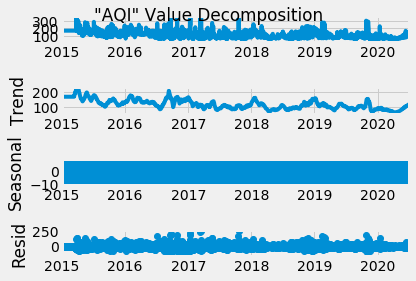

In [3]:
import statsmodels.api as sm
from pylab import rcParams
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
# using inbuilt style
plt.style.use("fivethirtyeight")
 
# Creating a dataframe with "Date" and "AQI"
# columns only. This dataframe is date indexed
decomposition_dataframe = timedata[['Date', 'AQI']].copy()
decomposition_dataframe.set_index('Date', inplace=True)
decomposition_dataframe.index = pd.to_datetime(decomposition_dataframe.index)
 
# using sm.tsa library, we are plotting
decomposition = sm.tsa.seasonal_decompose(decomposition_dataframe, model='additive', extrapolate_trend='freq', period=25)
decomp = decomposition.plot()
decomp.suptitle('"AQI" Value Decomposition')
 
# changing the runtime configuration parameters to
# have a desired plot of desired size, etc
rcParams['figure.figsize'] = 120, 100
rcParams['axes.labelsize'] = 120
rcParams['ytick.labelsize'] = 120
rcParams['xtick.labelsize'] = 120

In [4]:
data=timedata["AQI"]
data_train=data.head(1500)
data_test=data.tail(509)

In [5]:
orders=[(0,0,0),(0,0,1),(2,0,1),(1,1,1),(2,1,2),(1,2,1)]
orderslist=[]
rmselist=[]
for i in orders:
    orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data_train, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(len(data_train), len(data)-1)
    print(y_pred)
    from sklearn.metrics import mean_squared_error
    rmse=mean_squared_error(data_test,y_pred,squared=False)
    rmselist.append(rmse)
    print("Order={} ,rmse={}".format(i,rmse))

1500    126.102413
1501    126.102413
1502    126.102413
1503    126.102413
1504    126.102413
           ...    
2004    126.102413
2005    126.102413
2006    126.102413
2007    126.102413
2008    126.102413
Name: predicted_mean, Length: 509, dtype: float64
Order=(0, 0, 0) ,rmse=49.478907263626354
1500    104.809058
1501    126.101478
1502    126.101478
1503    126.101478
1504    126.101478
           ...    
2004    126.101478
2005    126.101478
2006    126.101478
2007    126.101478
2008    126.101478
Name: predicted_mean, Length: 509, dtype: float64
Order=(0, 0, 1) ,rmse=49.44575763104278
1500    101.605246
1501    110.125743
1502    115.101004
1503    118.010630
1504    119.716684
           ...    
2004    126.026245
2005    126.027364
2006    126.028475
2007    126.029580
2008    126.030678
Name: predicted_mean, Length: 509, dtype: float64
Order=(2, 0, 1) ,rmse=48.84425289770815
1500    101.526720
1501    110.106999
1502    115.174982
1503    118.168411
1504    119.936495
       

In [6]:
rmselist

[49.478907263626354,
 49.44575763104278,
 48.84425289770815,
 47.08194856635577,
 47.09782227740243,
 36.79473302164264]

In [7]:
result=pd.DataFrame()
result.insert(0,"Order",orderslist)
result.insert(1, "Order_Name", [1,2,3,4,5,6], True)
result.insert(2,"RMSE",rmselist)
result

,Order,Order_Name,RMSE
0,"(0, 0, 0)",1,49.478907
1,"(0, 0, 1)",2,49.445758
2,"(2, 0, 1)",3,48.844253
3,"(1, 1, 1)",4,47.081949
4,"(2, 1, 2)",5,47.097822
5,"(1, 2, 1)",6,36.794733


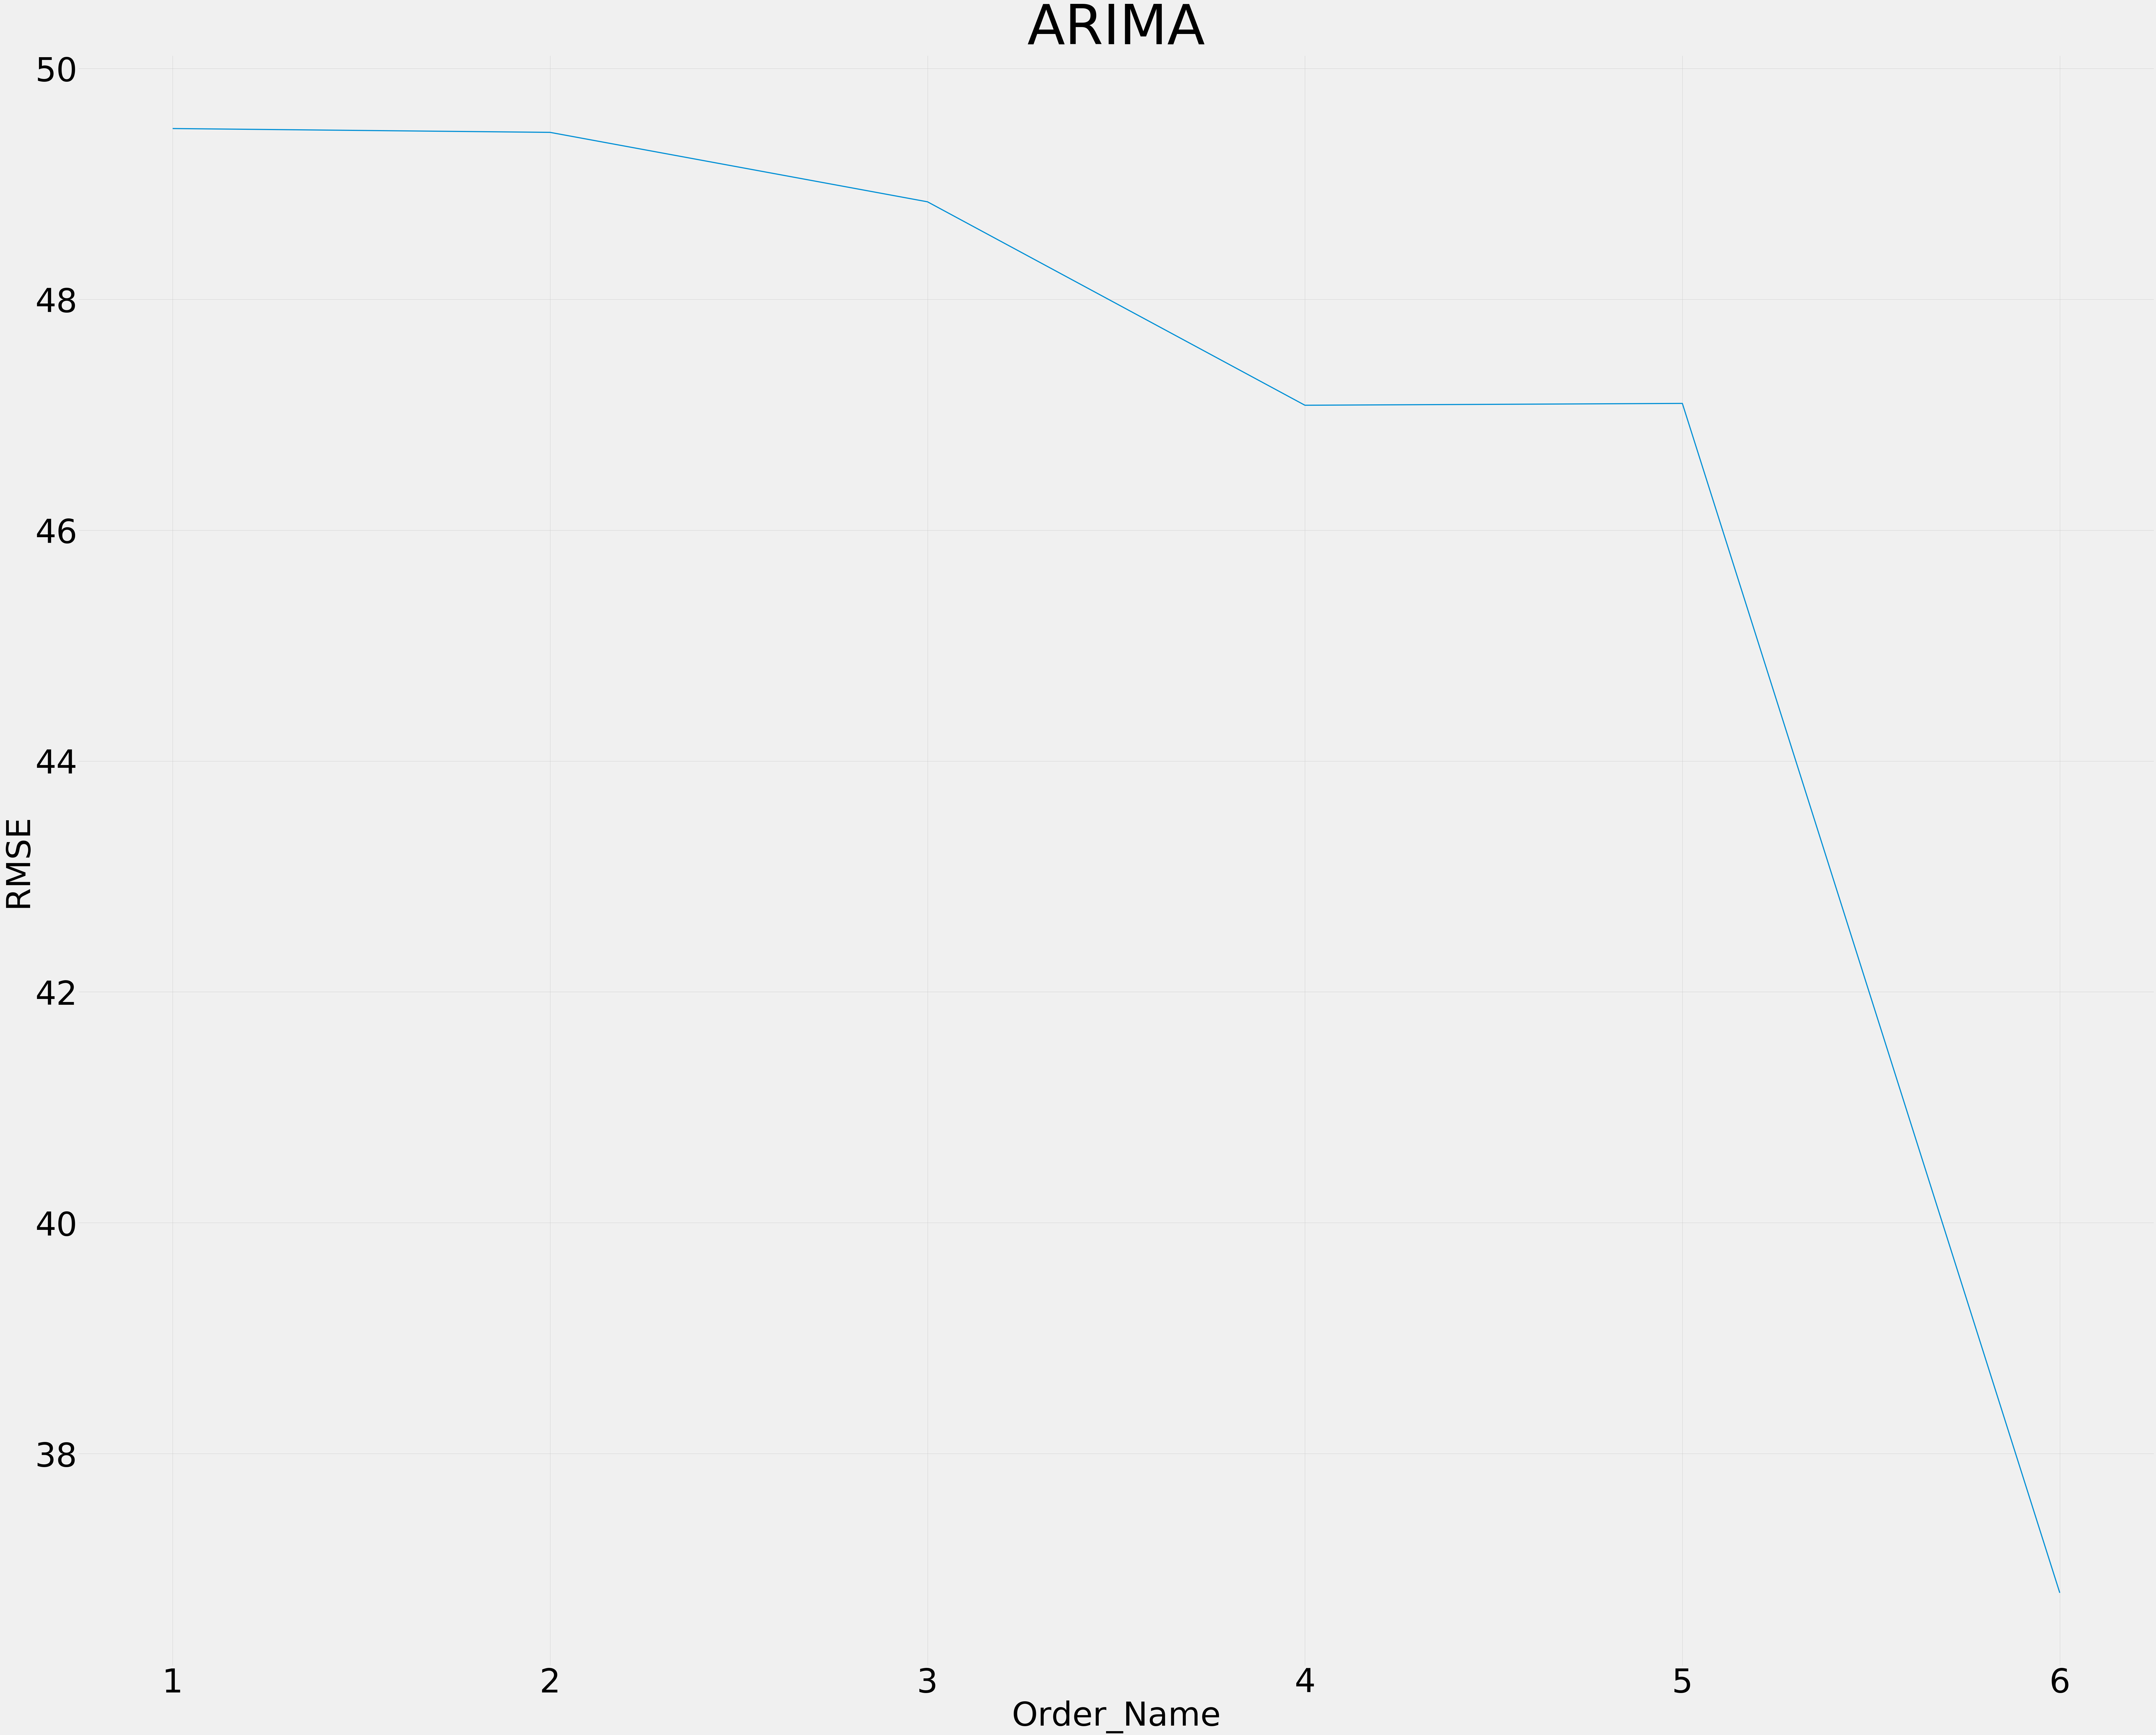

In [8]:
 #plot the graph using line plot
sns.lineplot(x = 'Order_Name', y = 'RMSE', data = result)
 
# Show the plot
plt.title("ARIMA", fontsize=200)
plt.show()